# Capitulo 4

## Algoritmo de Deutsch

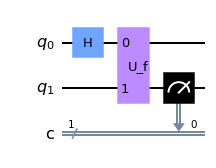

In [3]:
#Paso 1
from qiskit import QuantumCircuit
from qiskit.circuit import Gate

U_f = Gate(name='U_f', num_qubits=2, params=[])

qc = QuantumCircuit(2,1)
qc.h(0)
qc.append(U_f,[0,1])
qc.measure(1,0)

#print(qc.draw(output='latex_source'))
qc.draw(output='mpl')

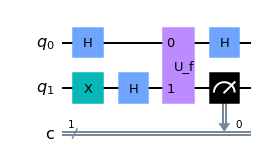

In [5]:
# Algoritmo para U_f
qc = QuantumCircuit(2,1)
qc.h(0)
qc.x(1)
qc.h(1)
qc.append(U_f,[0,1])
qc.h(0)
qc.measure(1,0)

#print(qc.draw(output='latex_source'))
qc.draw(output='mpl')

### Algoritmo

In [6]:
#Algoritmo de Deutsch
def Deutsch_Algorithm(oracle):
    """

    Parameters
    ----------
    f : Circuito cuántico U_f, dos qubits de entrada y dos qubits de salida

    Returns
    -------
    qc circuito cuántico correspondiente al algoritmo de Deutsch

    """
    qc = QuantumCircuit(2,1)
    qc.h(0)
    qc.x(1)
    qc.h(1)
    qc.append(oracle,[0,1])
    qc.h(0)
    qc.measure(0,0)
    return qc

In [8]:
import numpy as np
from qiskit.providers.aer import QasmSimulator
from qiskit import transpile
simulator = QasmSimulator()

n = 1

const_oracle = QuantumCircuit(n+1)

output = np.random.randint(2)
if output == 1:
    const_oracle.x(n)

const_oracle.draw()

qc = Deutsch_Algorithm(const_oracle) 

compiled_circuit = transpile(qc, simulator)

# Execute the circuit on the qasm simulator
job = simulator.run(compiled_circuit, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(compiled_circuit)
print("\nTotal count for 00 and 11 are:",counts)

# Draw the circuit
qc.draw()    


Total count for 00 and 11 are: {'0': 1000}


┌───┐     ┌────────────┐┌───┐┌─┐
q_0: ┤ H ├─────┤0           ├┤ H ├┤M├
     ├───┤┌───┐│  circuit-7 │└───┘└╥┘
q_1: ┤ X ├┤ H ├┤1           ├──────╫─
     └───┘└───┘└────────────┘      ║ 
c: 1/══════════════════════════════╩═
                                   0

## Algoritmo suma modular

#### Suma modular para números de 3 bits

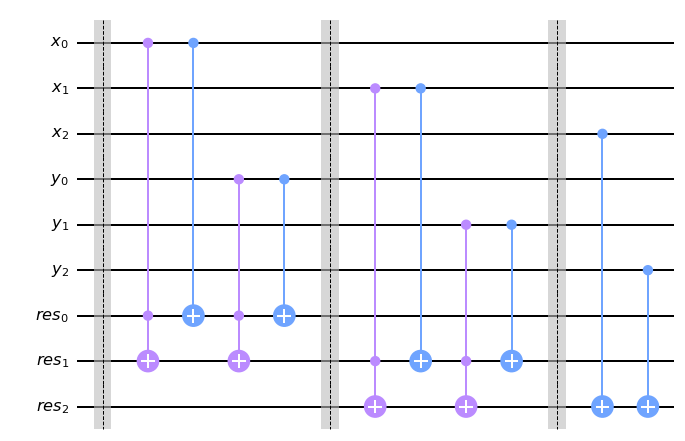

In [11]:
from qiskit import QuantumRegister

x_0 = QuantumRegister(1, name='x_0')
x_1 = QuantumRegister(1, name='x_1')
x_2 = QuantumRegister(1, name='x_2')
y_0 = QuantumRegister(1, name='y_0')
y_1 = QuantumRegister(1, name='y_1')
y_2 = QuantumRegister(1, name='y_2')
res_0 = QuantumRegister(1, name='res_0')
res_1 = QuantumRegister(1, name='res_1')
res_2 = QuantumRegister(1, name='res_2')

qc = QuantumCircuit(x_0,x_1,x_2,y_0,y_1,y_2,res_0,res_1,res_2)
qc.barrier()
qc.ccx(0,6,7)
qc.cx(0,6)
qc.ccx(3,6,7)
qc.cx(3,6)
qc.barrier()
qc.ccx(1,7,8)
qc.cx(1,7)
qc.ccx(4,7,8)
qc.cx(4,7)
qc.barrier()
qc.cx(2,8)
qc.cx(5,8)
#print(qc.draw(output='latex_source'))
qc.draw(output='mpl')

## Algoritmo Deutsch-Jozsa

In [24]:
#Pendiente

### Algoritmo suma modular n bits

In [12]:
def circuito_suma(n):
    qc = QuantumCircuit(3*n,n)
    for i in range(n-1):
        qc.barrier()
        qc.ccx(i,i+2*n,i+2*n+1)
        qc.cx(i,i+2*n)
        qc.ccx(i+n,i+2*n,i+2*n+1)
        qc.cx(i+n,i+2*n)
    qc.barrier()
    qc.cx(n-1,3*n-1)
    qc.cx(2*n-1,3*n-1)
    for i in range(n):
        qc.measure(2*n+i,i)
    return qc

In [14]:
def suma_bits(n,st1,st2):
    qc = QuantumCircuit(3*n,n)
    i = n-1
    for c in st1:
        if c=='1':
            qc.x(i)
        i-=1
    i=2*n-1
    for c in st2:
        if c=='1':
            qc.x(i)
        i-=1
    result = qc.compose(circuito_suma(n))
    return result

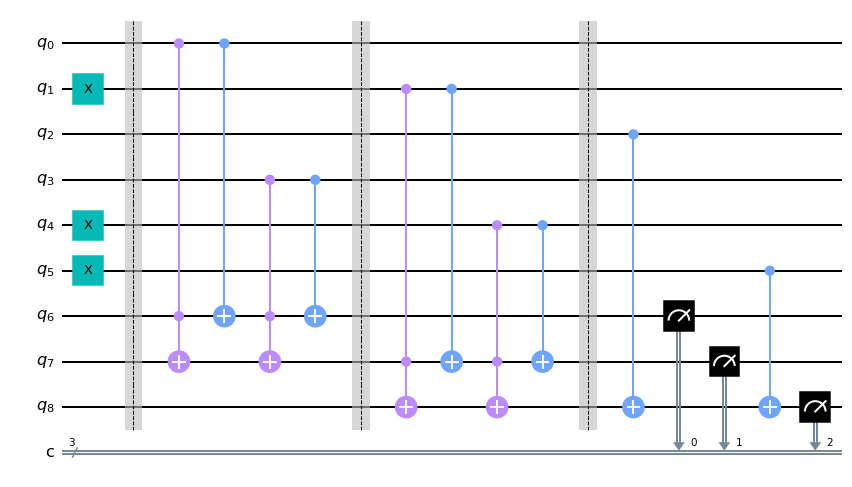

In [15]:
qc = suma_bits(3,'010','110')
qc.draw(output='mpl')

In [21]:
#Si queremos un programa que nos diga directamente el resultado:

def suma_modular(a,b):
    aux = max(a,b)
    m = min(a,b)
    a=aux
    b=m
    a = "{0:b}".format(a)
    b = "{0:b}".format(b)
    if (len(a)>len(b)):
        r = len(a)-len(b)
        st = '0'*r
        b=st+b
    qc = suma_bits(len(a),a,b)
    compiled_circuit = transpile(qc, simulator)
    job = simulator.run(compiled_circuit)
    result = job.result()
    counts = result.get_counts(compiled_circuit)
    print(qc.draw())
    print('El resultado de la suma en binario de ',a,'+',b, 'es: ',counts)
    return qc

In [22]:
suma_modular(3,3)
suma_modular(3,4)
suma_modular(1,5)

     ┌───┐ ░                      ░                 
q_0: ┤ X ├─░───■────■─────────────░─────────────────
     ├───┤ ░   │    │             ░                 
q_1: ┤ X ├─░───┼────┼─────────────░───■─────────────
     ├───┤ ░   │    │             ░   │             
q_2: ┤ X ├─░───┼────┼────■────■───░───┼─────────────
     ├───┤ ░   │    │    │    │   ░   │             
q_3: ┤ X ├─░───┼────┼────┼────┼───░───┼───────■─────
     └───┘ ░   │  ┌─┴─┐  │  ┌─┴─┐ ░   │  ┌─┐  │     
q_4: ──────░───■──┤ X ├──■──┤ X ├─░───┼──┤M├──┼─────
           ░ ┌─┴─┐└───┘┌─┴─┐└───┘ ░ ┌─┴─┐└╥┘┌─┴─┐┌─┐
q_5: ──────░─┤ X ├─────┤ X ├──────░─┤ X ├─╫─┤ X ├┤M├
           ░ └───┘     └───┘      ░ └───┘ ║ └───┘└╥┘
c: 2/═════════════════════════════════════╩═══════╩═
                                          0       1 
El resultado de la suma en binario de  11 + 11 es:  {'10': 1024}
           ░                      ░                      ░                    
q_0: ──────░───■────■─────────────░──────────────────────░───